# Data Analysis for Rayleigh Quotient Comparison

In [1]:
import numpy as np
import math 
import networkx as nx
import itertools
import time
from sage.all import *
import h5py
from matplotlib import pyplot as plt
from pathlib import Path

### Helper Functions

In [2]:
def generate_diameter_3_graphs(n):
    """ Cycles through graphs on n vertices finding the ones with diameter 3 whose complements have diameter 3 and saves both.
        This generation is deterministic so we can trust the ordering for reruns.
        Parameters
        ----------
        n: int 
            Number of vertices to build the graphs from

        Returns
        -------
        Graphs: list(graphs)
            List of Sagemath graphs whose diameter is 3 and whose complement is also diameter 3
        Comps: list(graphs)
            The complement of the graphs above
    """
    Graphs, Comps = [], []
    for G in graphs(n):
        if G.diameter() == 3:
            H = G.complement()
            if H.diameter() == 3:
                Graphs.append(G)
                Comps.append(H)
    return Graphs, Comps

In [3]:
def compare_dc_groups(hdf5_file='results/results_on_6.h5', n=6):
    """ Function to compare the spectral radius eigenvectors of the original and related dandelion complement family.
        Parameters
        ----------
        hdf5_file: string
            File path to the hdf5_file to evaluate
        n: int 
            Number of vertices the graphs in the file are built on

        Returns
        -------
        Graphs: list(graphs)
            List of Sagemath graphs whose diameter is 3 and whose complement is also diameter 3
        Comps: list(graphs)
            The complement of the graphs above
    
    """
    Graphs, Comps = generate_diameter_3_graphs(n)

    v2dc_group_0 = []
    v2dc_group_1 = []
    v2dc_group_2 = []
    v2dc_group_3 = []
    v2dc_group_4 = []

    with h5py.File(hdf5_file, 'r') as file:
        for i in range(len(Graphs)):
            group = file[f'Graph_{i}_on_{n}_vertices']
            v2dc_group_map = group['v2dc_group_map'][:]
            G_eigvec = group['G_eigvec'][:]
            DC_eigvec = group['DC_eigvec'][:]
            vec_diff = DC_eigvec - G_eigvec

            for j in range(n):
                if v2dc_group_map[j] == 0:
                    v2dc_group_0.append(vec_diff[j])
                if v2dc_group_map[j] == 1:
                    v2dc_group_1.append(vec_diff[j])
                elif v2dc_group_map[j] == 2:
                    v2dc_group_2.append(vec_diff[j])
                elif v2dc_group_map[j] == 3:
                    v2dc_group_3.append(vec_diff[j])
                else:
                    v2dc_group_4.append(vec_diff[j])

    return v2dc_group_0, v2dc_group_1, v2dc_group_2, v2dc_group_3, v2dc_group_4

In [4]:
def plot_dc_groups(distributions, titles):
    """ Function to plot the differences in the groups between original and dc groups.
        Parameters
        ----------
        distributions: list(list(float))
            Each of the vertex to dandelion complement group differences
        titles: list(strings) 
            Desired titles for each group
    """
    n = len(distributions)
    plt.figure(figsize=(4*n,8))

    for j, dist in enumerate(distributions):

        plt.subplot(2, n, j+1)
        plt.title(titles[j])
        plt.hist(dist)

        plt.subplot(2, n, n+j+1)
        plt.boxplot(dist)

    plt.tight_layout()
    plt.show()

In [5]:
results_path = '/home/seyfdall/compute/graph_theory/laplace-spread-conjecture/results/'
titles = ['x', 'A', 'C', 'B', 'y']

### Analysis on 6 Vertices

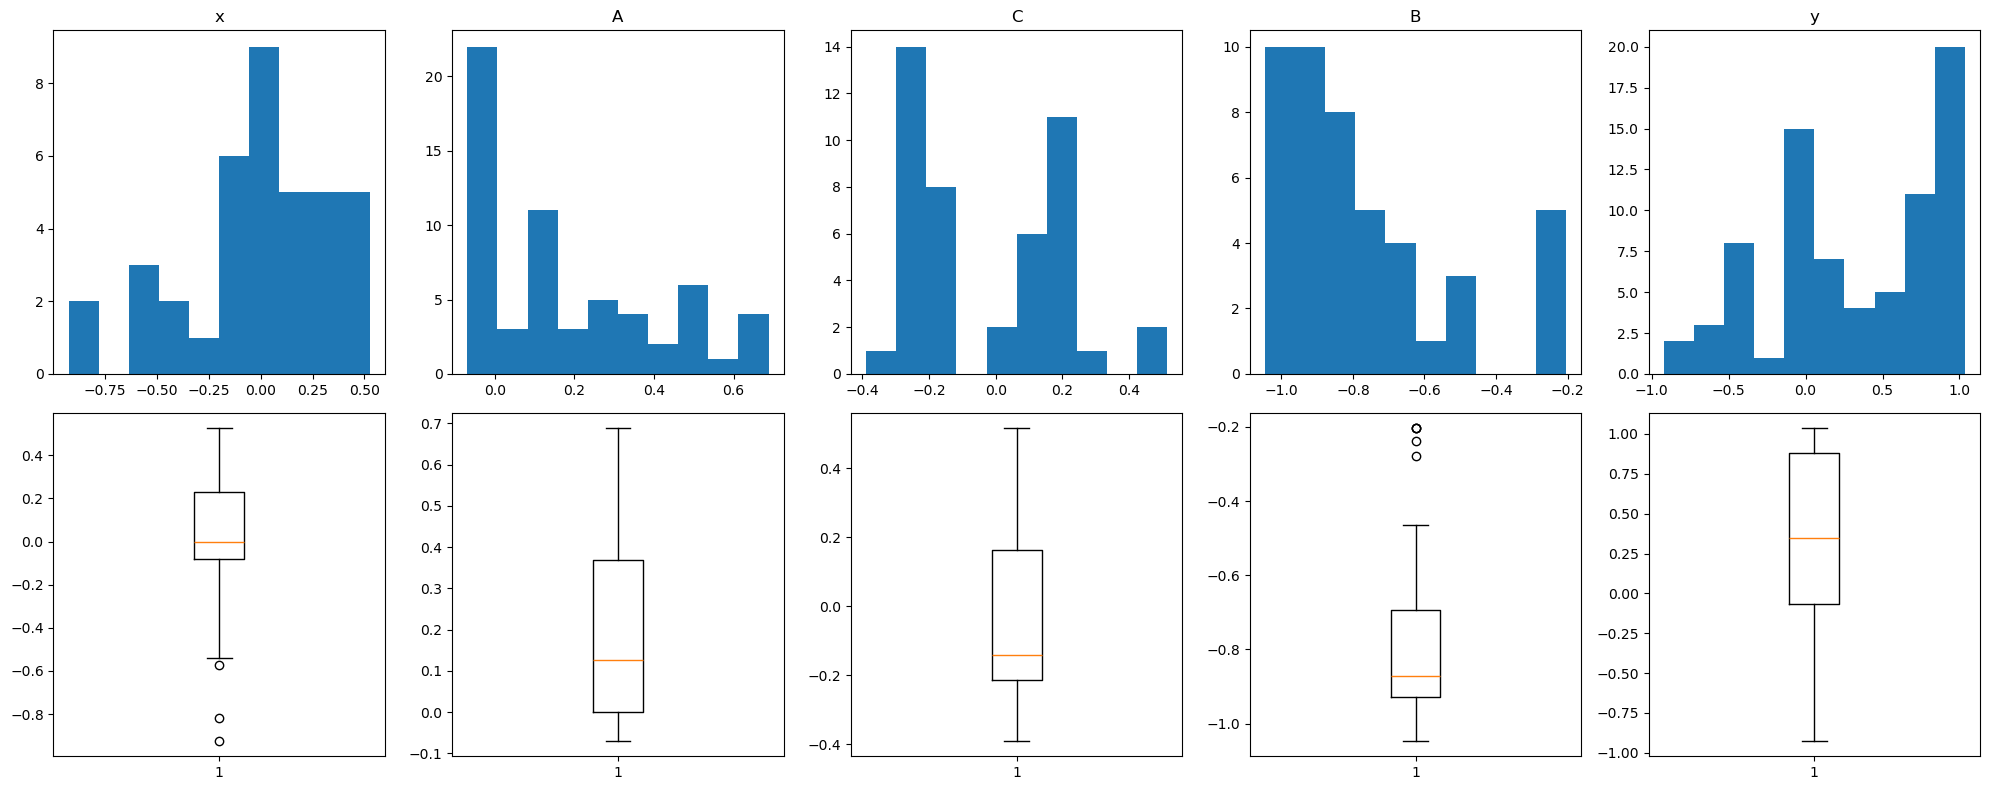

In [6]:
results_6_path = results_path + 'results_on_6.h5'
distributions = compare_dc_groups(hdf5_file=results_6_path, n=6)
plot_dc_groups(distributions, titles)

### Analysis on 7 Vertices

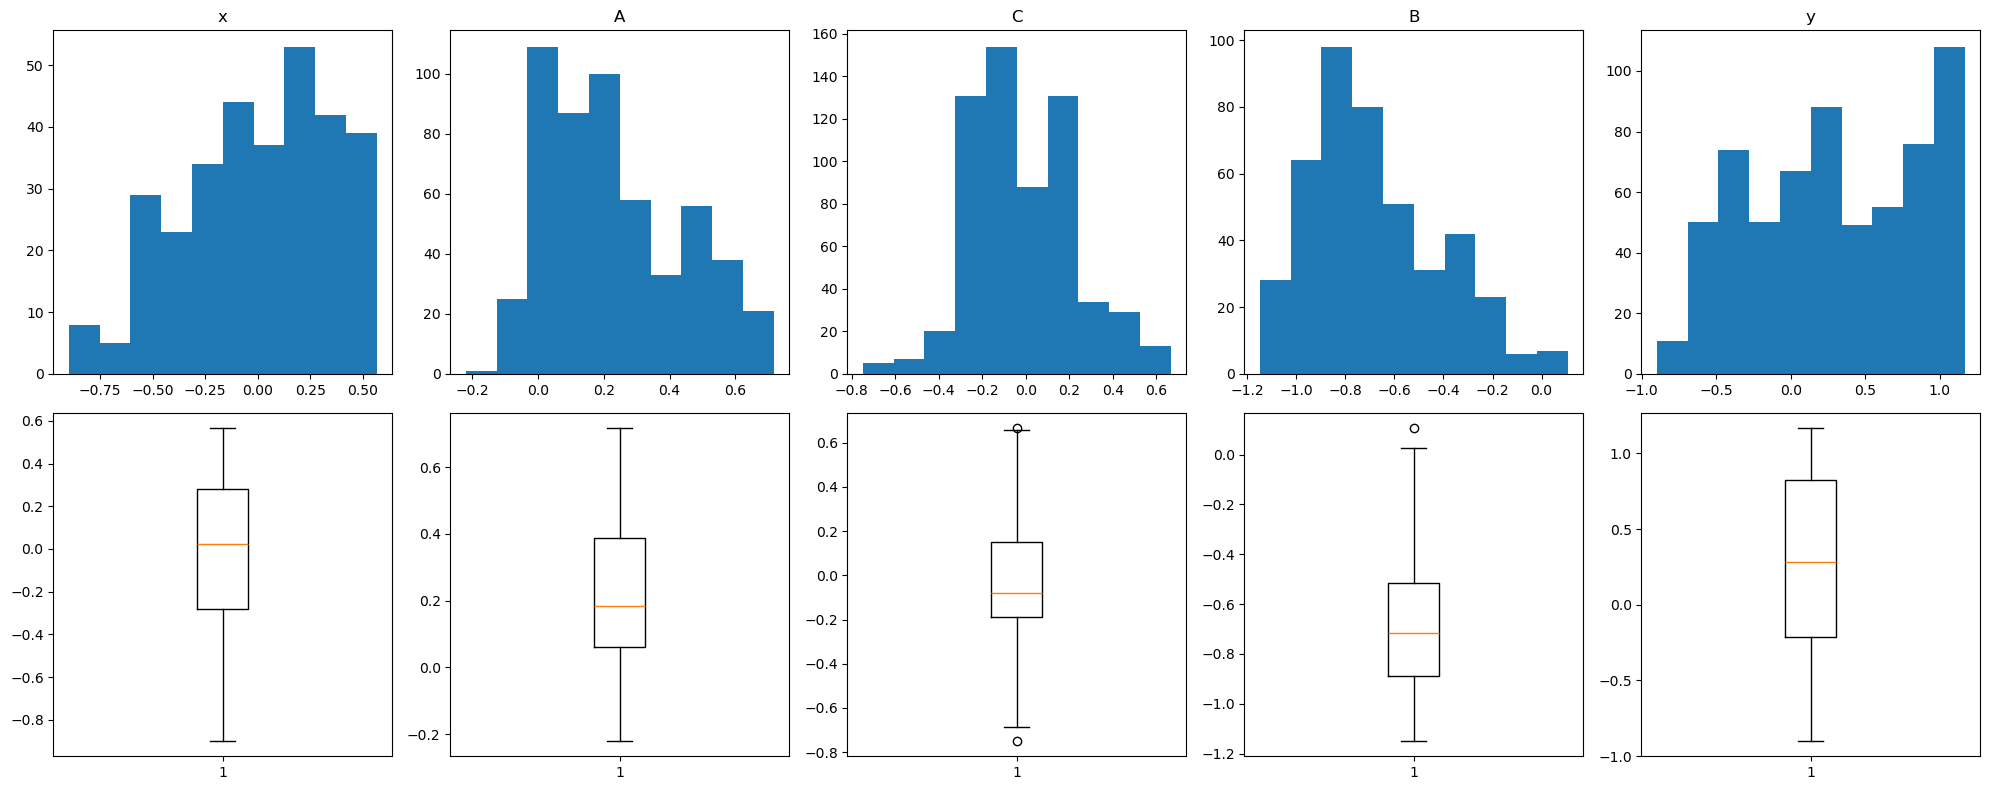

In [7]:
results_7_path = results_path + 'results_on_7.h5'
distributions = compare_dc_groups(hdf5_file=results_7_path, n=7)
plot_dc_groups(distributions, titles)

### Analysis on 8 Vertices

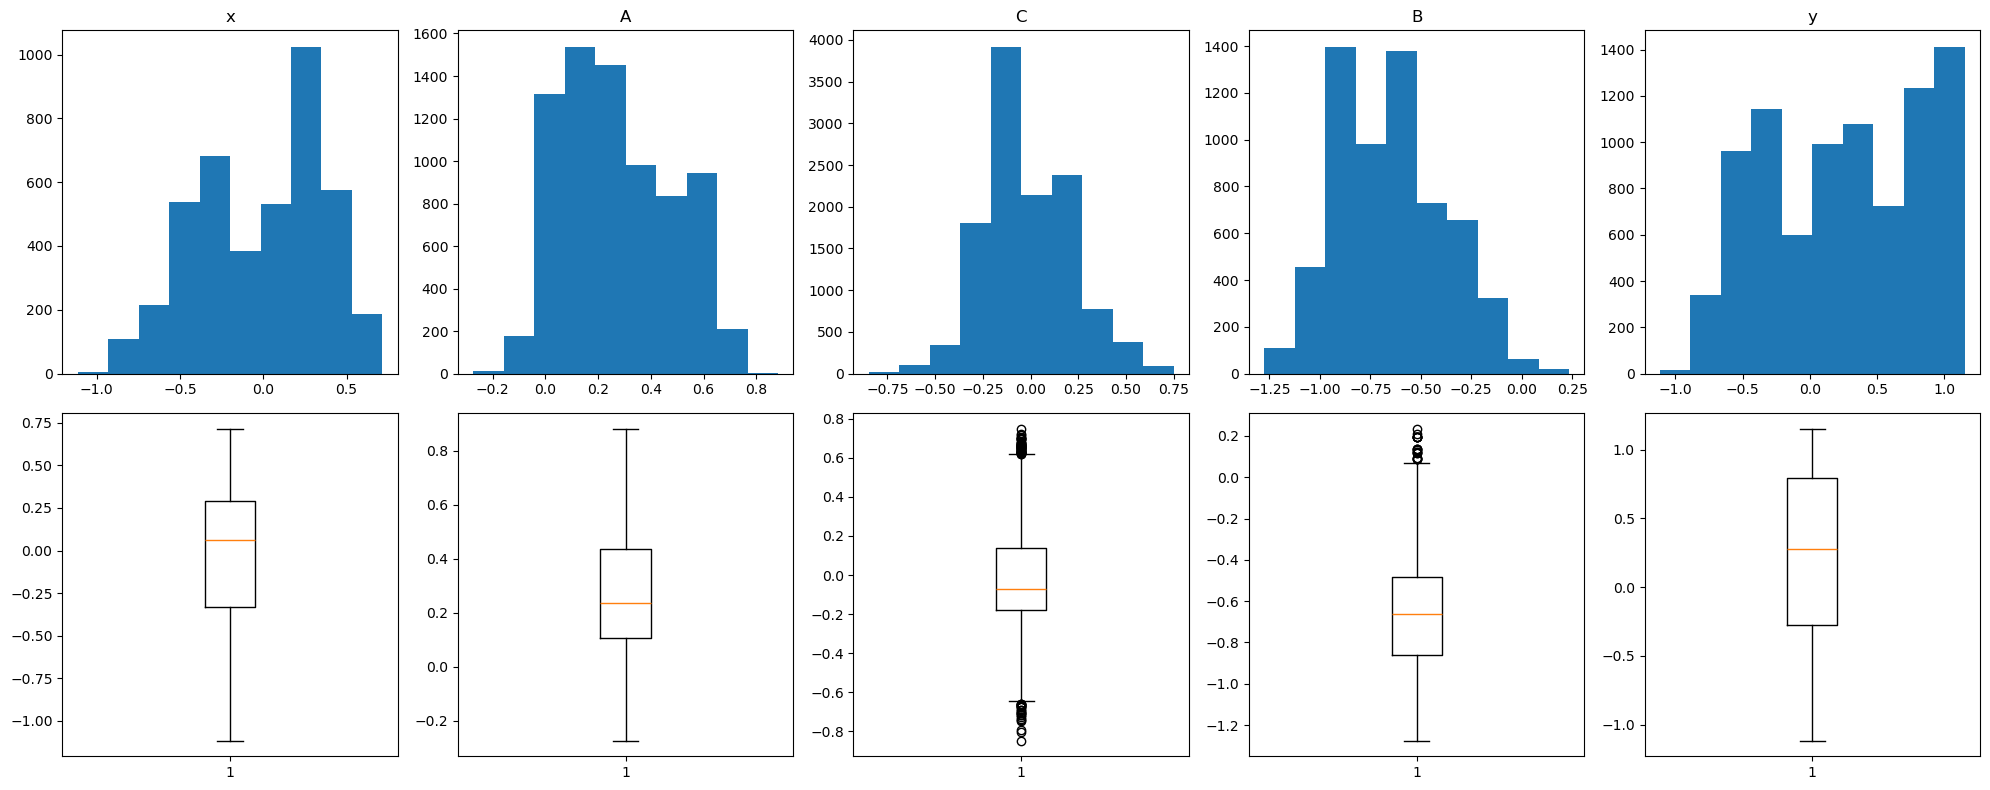

In [8]:
results_8_path = results_path + 'results_on_8.h5'
distributions = compare_dc_groups(hdf5_file=results_8_path, n=8)
plot_dc_groups(distributions, titles)